In [1]:
%load_ext autoreload
%autoreload 2
from easing import easing
import numpy as np
import pandas as pd

# Introduction

With the module `easing`, an animation needs to be created in three steps:

1. &ensp;[Upload the data into an instance of the `Eased` class](#step1)
2. &ensp;[Apply an easing method onto the instance](#step2)
3. &ensp;[Create the animation](#step3)

# Steps

## Step 1: Create a new instance <a class="anchor" id="step1"></a>

Prior to creating animation, you need to create a class by loading the data itself. The input data must be either a `numpy.array` or `pandas.DataFrame`. A DataFrame is generally preferred, as it allows keyframe labelling. The input data must have as many rows as keyframes and twice as many columns as the object coordinates, i.e. the columns are consecutive pairs of x- and y-coordinates:

```python
keyframe1_df = pd.DataFrame({
    "x": [0, 1, 2, 3, 4],
    "y": [0, 1, 2, 3, 4]})

keyframe2_df = pd.DataFrame({
    "x": [0, 1, 2, 3, 4],
    "y": [2, 2, 2, 2, 2]})

kf1_flattened = keyframe1_df[["x", "y"]].to_numpy().reshape(1,-1)
kf2_flattened = keyframe2_df[["x", "y"]].to_numpy().reshape(1,-1)

data_df = pd.DataFrame(np.vstack([kf1_flattened, kf2_flattened]))
eased_data = easing.Eased(data_df)
```

The `Eased` class accepts two additional parameters: `in_t` and `wrap`:

Parameter `in_t` accepts a list of integers, where each integer is related to the rows of the input data. The easing will be applied to the rows specified in the `in_t` parameter, in the order given. If `in_t` is not specified, the easing will be applied to all rows in order. 

The `wrap` parameter accepts a boolean value, which determines whether the easing should wrap around the last keyframe. If set to `True`, the last keyframe transitions back to the first keyframe.

In [2]:
data = np.random.random((2,8))
data_df = pd.DataFrame(data, index = ['stage1', 'stage2'])

eased_data = easing.Eased(data_df, in_t=[0,1], wrap=False)

## Step 2: Apply an easing method <a class="anchor" id="step2"></a>

Different animation methods can then be called on an `Eased` instance: 
* **no_ease**: Transition without interpolation.
* **power_ease**:  Transition based on powers (e.g. linear, quadratic, cubic etc.).
* **overshoot_ease**: Bouncy transition by overshooting the target value.

All methods share three main parameters: `fpt`, `istall` and `fstall`. The first parameter `fpt` is the number of frames per transition. Both `istall` and `fstall` are booleans that, if set to `True`, will add a stall at the beginning and end of the animation, respectively (by effectively duplicating keyframes).

In [3]:
eased_data.no_ease()

# or

eased_data.power_ease(n=3)   # n is the power of the easing function

# or

eased_data.overshoot_ease(freq=0.1)  # freq is frequency of sine function

## Step 3: Create the animation <a class="anchor" id="step3"></a>

From an `Eased` instance three types of animations can be created: `scatter_animation2d`, `polyline_animation2d`, `polygon_animation2d`. An animation can also be created with the `ease.animation2d()` method, which allows multiple types of data to be animated simultaneously. More on that later. 

* *scatter_animation2d*: &ensp;Animates a scatter plot.
* *polyline_animation2d*:  &ensp;Animates a polyline.
* *polygon_animation2d*:  &ensp;Animates a polygon.

All of these methods share the following parameters:
* **duration**: &ensp;Duration of the animation in seconds.
* **destination**: &ensp;Path to save the animation. If not specified, the animation will not be saved.
* **save_main_frames**: &ensp;If set to `True`, the main frames of the animation will be saved as images.
* **feat_kws**: &ensp;Dictionary of keyword arguments for the animation features.
* **ax_kws**: &ensp;Dictionary of keyword arguments for the axis.
* **label**: &ensp;If set to `True`, the plot will display the keyframe labels.
* **label_kws**: &ensp;Dictionary of keyword arguments for the labels.

MovieWriter imagemagick unavailable; using Pillow instead.


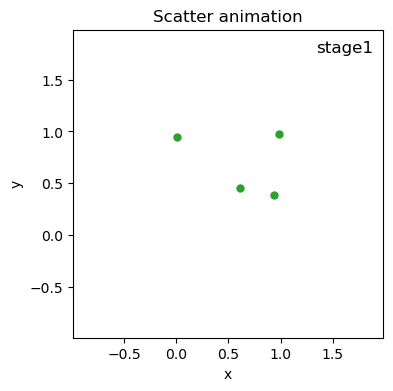

In [5]:
eased_data.scatter_animation2d(duration=0.7, label=True, 
                               feat_kws={'color':"#2ca02c"},
                               ax_kws={'xlabel':'x', 'ylabel':'y', 'title':'Scatter animation'},
                               destination='media/scatter_animation2d.gif', figsize=(4,4),
                               )

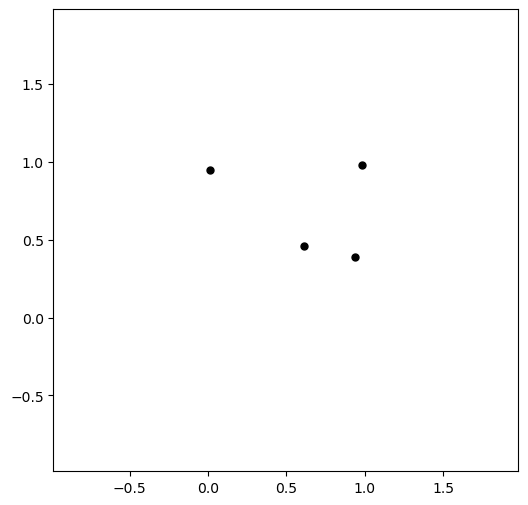

In [6]:
eased_data.scatter_animation2d()

MovieWriter imagemagick unavailable; using Pillow instead.


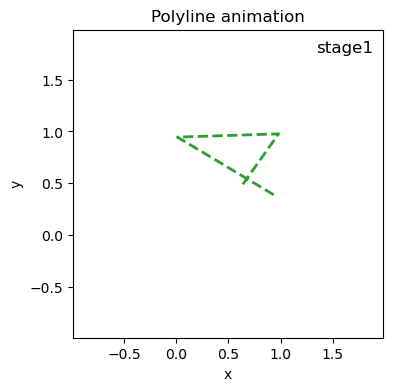

In [7]:
eased_data.polyline_animation2d(duration=0.7, label=True, 
                                feat_kws={'color':"#2ca02c", 'linewidth':2, 'linestyle':'--'},
                                ax_kws={'xlabel':'x', 'ylabel':'y', 'title':'Polyline animation'},
                                destination='media/polyline_animation2d.gif', figsize=(4,4),
                                )

MovieWriter imagemagick unavailable; using Pillow instead.


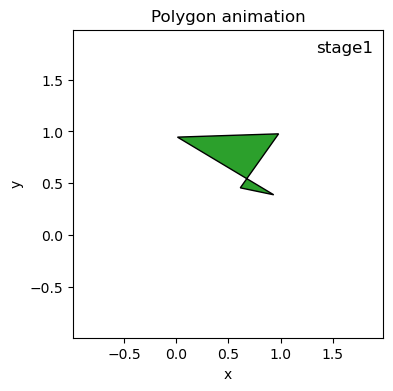

In [8]:
eased_data.polygon_animation2d(duration=0.7, label=True, 
                               feat_kws={'facecolor':"#2ca02c", 'edgecolor':'k'},
                               ax_kws={'xlabel':'x', 'ylabel':'y', 'title':'Polygon animation'},
                               #destination='media/polygon_animation2d.gif', 
                               figsize=(4,4),
                               )

To animate multiple types of data simultaneously, the `ease.animation2d()` method can be used. This method has two mandatory parameters: a list of `Eased` instances and a list of strings representing the desired the animation type for each eased instance. Options are *points*, *line* and *polygon*. 

Analogous to the other animation methods, `animation2d()` accepts the same parameters described above, with the only difference being that `feat_kws` is names `feats_kws` and accepts a list of dictionaries of keyword arguments, one for each eased instance.

In [12]:
eased_list = [eased_data, eased_data]
anim_type = ['line', 'points']

easing.animation2d(eased_list, anim_type, duration=0.7, 
                   feats_kws=[{'color':'grey'}, {'color':'k'}],
                   ax_kws={'xlabel':'x', 'ylabel':'y', 'title':'Points+Line animation'}, 
                   label=True, label_kws=dict(position = (0.0, 0.0)),
                   destination='media/animations2d.gif',
                   figsize=(4,4),
                   )

TypeError: animation2d() got an unexpected keyword argument 'figsize'